# Project: Wrangling and Analyzing Data

## Data Gathering
In the cell below, i will gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#loading in the already downloaded Twitter archive data
import pandas as pd
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [3]:
#saving the response
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [2]:
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# The API keys will be hidden with configparser to comply with Twitter's API terms and conditions

import configparser
config = configparser.ConfigParser()
config.read('config.ini')

api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

auth = OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [4]:
#creating a variable for the enhanced twitter_archive's twitter_id values
tweet_ids = twitter_archive.tweet_id.values

In [5]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
rank = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        rank += 1
        print(str(rank) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success
294: 837820167694528512
Success
295: 837482249356513284
Success
296: 837471256429613056
Success
297: 837366284874571778
Fail
298: 837110210464448512
Success
299: 837012587749474308
Fail
300: 836989968035819520
Success
301: 836753516572119041
Success
302: 836677758902222849
Success
303: 836648853927522308
Success
304: 836397794269200385
Success
305: 836380477523124226
Success
306: 836260088725786625
Success
307: 836001077879255040
Success
308: 835685285446955009
Success
309: 835574547218894849
Success
310: 835536468978302976
Success
311: 835309094223372289
Success
312: 835297930240217089
Success
313: 835264098648616962
Success
314: 8

Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success
551: 804738756058218496
Success
552: 804475857670639616
Success
553: 804413760345620481
Success
554: 804026241225523202
Success
555: 803773340896923648
Success
556: 803692223237865472
Success
557: 803638050916102144
Success
558: 803380650405482500
Success
559: 803321560782307329
Success
560: 803276597545603072
Success
561: 802952499103731712
Success
562: 802624713319034886
Success
563: 802600418706604034
Success
564: 802572683846291456
Success
565: 802323869084381190
Success
566: 802265048156610565
Success
567: 802247111496568832
Fail
568: 802239329049477120
Success
569: 802185808107208704
Success
570: 801958328846974976
Success
571

Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809: 771770456517009408
Success
810: 771500966810099713
Success
811: 771380798096281600
Success
812: 771171053431250945
Success
813: 771136648247640064
Success
814: 771102124360998913
Success
815: 771014301343748096
Success
816: 771004394259247104
Fail
817: 770787852854652928
Success
818: 770772759874076672
Success
819: 770743923962707968
Fail
820: 770655142660169732
Success
821: 770414278348247044
Success
822: 770293558247038976
Success
823: 770093767776997377
Success
824: 770069151037685760
Success
825: 769940425801170949
Success
826: 769695466921623552
Success
827: 769335591808995329
Success
828: 7

Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
1064: 741067306818797568
Success
1065: 740995100998766593
Success
1066: 740711788199743490
Success
1067: 740699697422163968
Success
1068: 740676976021798912
Success
1069: 740373189193256964
Success
1070: 740365076218183684
Success
1071: 740359016048689152
Success
1072: 740214038584557568
Success
1073: 739979191639244800
Success
1074: 739932936087216128
Success
1075: 739844404073074688
Success
1076: 739623569819336705
Success
1077: 739606147276148736
Success
1078: 739544079319588864
Success
1079: 739485634323156992
Success
1080: 739238157791694849
Success
1081: 738891149612572673
Success
10

Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
1313: 707014260413456384
Success
1314: 706904523814649856
Success
1315: 706901761596989440
Success
1316: 706681918348251136
Success
1317: 706644897839910912
Success
1318: 706593038911545345
Success
1319: 706538006853918722
Success
1320: 706516534877929472
Success
1321: 706346369204748288
Success
1322: 706310011488698368
Success
1323: 706291001778950144
Success
1324: 706265994973601792
Success
1325: 706169069255446529
Success
1326: 706166467411222528
Success
1327: 706153300320784384
Success
1328: 705975130514706432
Success
1329: 705970349788291072
Success
1330: 705898680587526145
Success
13

Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
1562: 688385280030670848
Success
1563: 688211956440801280
Success
1564: 688179443353796608
Success
1565: 688116655151435777
Success
1566: 688064179421470721
Success
1567: 687841446767013888
Success
1568: 687826841265172480
Success
1569: 687818504314159109
Success
1570: 687807801670897665
Success
1571: 687732144991551489
Success
1572: 687704180304273409
Success
1573: 687664829264453632
Success
1574: 687494652870668288
Success
1575: 687480748861947905
Success
1576: 687476254459715584
Success
1577: 687460506001633280
Success
1578: 687399393394311168
Success
1579: 687317306314240000
Success
15

Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
18

Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
20

Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
23

In [4]:
#creating a tweet dataframe from the tweet_json.txt file
df_list = []
with open('tweet_json.txt', 'r') as file:
    for tweet_line in file:
        data = json.loads(tweet_line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        df_list.append({
            'tweet_id' : tweet_id,
            'retweet_count' : retweet_count,
            'favorite_count' : favorite_count          
        })
    
tweet_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
    

In [5]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6975,33711
1,892177421306343426,5276,29238
2,891815181378084864,3466,21982
3,891689557279858688,7197,36811
4,891327558926688256,7721,35195


## Assessing Data

In [6]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
tweet_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6975,33711
1,892177421306343426,5276,29238
2,891815181378084864,3466,21982
3,891689557279858688,7197,36811
4,891327558926688256,7721,35195
5,891087950875897856,2589,17753
6,890971913173991426,1649,10323
7,890729181411237888,15689,56688
8,890609185150312448,3605,24434
9,890240255349198849,6074,27856


In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [12]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
Buddy          7
an             7
Toby           7
Daisy          7
Bailey         7
Scout          6
Leo            6
Dave           6
Oscar          6
Bella          6
Stanley        6
Rusty          6
Jack           6
Koda           6
Milo           6
Jax            6
Chester        5
            ... 
Fido           1
Teddy          1
Brutus         1
Steve          1
Jeb            1
Ito            1
Trip           1
Sora           1
Henry          1
Jo             1
Pippin         1
Gilbert        1
Miguel         1
Oddie          1
Chaz           1
Bones          1
Fillup         1
Crawford       1
Pumpkin        1
Arya           1
Dunkin         1
Sojourner      1
Sonny          1
Harry          1
Jameson        1
Geno           1
Bruno          1
Marvin        

In [13]:
# Check to see the tweet with a rating denominator less than 10.
twitter_archive.rating_denominator.loc[twitter_archive.rating_denominator < 10]

313     0
516     7
2335    2
Name: rating_denominator, dtype: int64

In [14]:
# Checking to see the number of rating_denominators greater than 10
large_denominators = twitter_archive.rating_denominator.loc[twitter_archive.rating_denominator > 10]
print(large_denominators.count())
large_denominators 

20


342      15
433      70
784      11
902     150
1068     11
1120    170
1165     20
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1598     20
1634    130
1635    110
1662     11
1663     16
1779    120
1843     80
Name: rating_denominator, dtype: int64

In [15]:
twitter_archive.rating_denominator[twitter_archive.rating_denominator.isnull()]

Series([], Name: rating_denominator, dtype: int64)

In [16]:
#To see if there is a null value in rating_numerator
twitter_archive.rating_numerator[twitter_archive.rating_numerator.isnull()]

Series([], Name: rating_numerator, dtype: int64)

In [17]:
#Checking where the image predictions are found not to be dog
# 0 represents False and 1 represents True.
image_predictions.query('p1_dog == "0" & p2_dog == "0" & p3_dog == "0"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [18]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
tweet_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2460.287065,7030.572841
std,6.820795e+16,4166.636688,10925.390788
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,492.500000,1221.000000
50%,7.178418e+17,1144.000000,3038.000000
75%,7.986547e+17,2846.000000,8570.000000
max,8.924206e+17,70383.000000,144343.000000


In [21]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2082,670815497391357952,NaN,NaN,2015-11-29 04:04:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sage. He likes to burn shit. 10/10 htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670815497...,10,10,Sage,None,None,None,None
886,759943073749200896,NaN,NaN,2016-08-01 02:45:22 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a wicked fast pupper. 12/10 camera coul...,NaN,NaN,NaN,https://vine.co/v/5AJm5pq7Kav,12,10,None,None,None,pupper,None
406,823719002937630720,NaN,NaN,2017-01-24 02:28:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Balto. He's very conten...,7.840579e+17,4.196984e+09,2016-10-06 15:49:14 +0000,"https://vine.co/v/5gKxeUpuKEr,https://vine.co/...",12,10,Balto,None,None,None,None
2026,671879137494245376,NaN,NaN,2015-12-02 02:30:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brad. He's a chubby lil pup. Doesn't r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671879137...,5,10,Brad,None,None,None,None
2176,669203728096960512,NaN,NaN,2015-11-24 17:19:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Samsom. He is sexually confused. Reall...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669203728...,9,10,Samsom,None,None,None,None


In [22]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1427,772615324260794368,https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg,1,dalmatian,0.556595,True,whippet,0.151047,True,American_Staffordshire_terrier,0.096435,True
2020,880872448815771648,https://pbs.twimg.com/media/DDl8zzJW0AAisCJ.jpg,1,Pembroke,0.791416,True,Norwich_terrier,0.061393,True,Chihuahua,0.033726,True
1223,744709971296780288,https://pbs.twimg.com/media/ClW9w7mWEAEFN1k.jpg,1,Shetland_sheepdog,0.234431,True,Samoyed,0.114876,True,collie,0.086614,True
947,704761120771465216,https://pbs.twimg.com/media/CcfQgHVWoAAxauy.jpg,1,Siamese_cat,0.202294,False,Chihuahua,0.100418,True,basenji,0.072097,True
1704,817415592588222464,https://pbs.twimg.com/media/C1gLJVpWgAApI3r.jpg,1,Doberman,0.806163,True,black-and-tan_coonhound,0.097386,True,miniature_pinscher,0.085993,True


In [23]:
tweet_df.sample(5)

,tweet_id,retweet_count,favorite_count
478,813157409116065792,2059,7357
1181,715696743237730304,1162,3607
570,799297110730567681,2551,9364
233,846042936437604353,2582,14788
1984,672231046314901505,876,1618


In [24]:
twitter_archive.duplicated().sum()

0

In [25]:
image_predictions.duplicated().sum()

0

In [26]:
sum(tweet_df.duplicated())

0

In [27]:
#Checking for dogs with multiple stages
twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']].sum(axis = 1).value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
dtype: int64

In [28]:
#Checking the dogs with doggo and floofer stages
twitter_archive[(twitter_archive['doggo'] == 'doggo') & (twitter_archive['floofer'] == 'floofer')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [29]:
#Checking the dogs with doggo and puppo stages
twitter_archive[(twitter_archive['doggo'] == 'doggo') & (twitter_archive['puppo'] == 'puppo')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [30]:
#Checking the dogs with doggo and pupper stages
twitter_archive[(twitter_archive['doggo'] == 'doggo') & (twitter_archive['pupper'] == 'pupper')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


### Quality issues

1. Not all predictions in the image_predictions table are dogs.`

2. Some tweet_ids reflects retweeted tweets, which are not needed.

3. Multiple stages for some dogs. 1 doggo and floofer instead of just "floofer", 1 doggo and puppo instead of just "puppo", (2 doggo and pupper instead of just"doggo" and another 2 doggo and pupper intead of just "pupper".

4. Some columns in the twitter archive have too many null values(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).

5. 20 tweets has a rating denominator greater than 10. 

6. 3 tweets has a rating denominator less than 10.

7. Rating denominator column in tweet_archive table has missing values.

8. Invalid dog name such as "a", "such", "quite", "the" and "the" instead of the default "None" in `twitter_archive` table.

9. Erroneous datatypes for two columns in the `twitter_archive` table(timestamp,retweeted_status_timestamp)


### Tidiness issues
1. Some rows with two dog stage formats has two name observation in the original text.

2. The 3 dataframes are one observational unit 

3. There are two variables in the timestamp column, date and timestamp.

## Cleaning Data
Since i want to work on original tweets with dog images only, i'm going to work first on the image_predictions and twitter_archive dataframes before anything else.

In [31]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_df_clean = tweet_df.copy()

### Tidiness Issue 1:  Some rows with two dog stage formats has two name observation in the original text.


#### Define: Drop the rows with this problem.

#### Code

In [32]:
#create an index list of all the rows
#with the problem
index_list = [531, 565, 733, 778, 822, 889, 1063, 1113]
twitter_archive_clean.drop(index_list, axis = 0, inplace=True)

#### Test

In [33]:
twitter_archive_clean.index == index_list

False

### Quality Issue 1: Not all predictions in the image_predictions table are dogs.

#### Define: Create a new variable by filtering the image_predictions_clean table by p1_dog, p2_dog and p3_dog being equal to False. Then drop the rows of this new variable from the image_predictions_clean table. In this columns, True can be represented by 1 and False by 0.  

#### Code

In [34]:
false_images = image_predictions_clean.query('p1_dog == "0" & p2_dog == "0" & p3_dog == "0"')
image_predictions_clean.drop(false_images.index, inplace = True) 

#### Test

In [35]:
image_predictions_clean.query('p1_dog == "0" & p2_dog == "0" & p3_dog == "0"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Quality Issue 2: Some tweet_ids reflects retweeted tweets, which are not needed.


#### Define: Filter the twitter_archive_clean dataframe by the retweeted_status_id having NaN and assign it back to the dataframe.

#### Code

In [36]:
twitter_archive_clean = twitter_archive_clean.loc[twitter_archive_clean.retweeted_status_id.isnull()]

#### Test

In [37]:
#Check if there is any non-null value in the retweeted_status_id column
twitter_archive_clean.retweeted_status_id.notnull().any()

False

### Quality Issue 3: Multiple stages for some dogs. 1 doggo and floofer instead of just "floofer", 1 doggo and puppo instead of just "puppo", (2 doggo and pupper instead of just"doggo" and another 2 doggo and pupper intead of just "pupper".


#### Define: Replace the wrong stage in the multiple stage format with the "None"

#### Code

In [38]:
#Replacing the dog with doggo and floofer stage with doggo stage as None
first_multiple_stage = twitter_archive_clean[(twitter_archive_clean['doggo'] == 'doggo') & (twitter_archive_clean['floofer'] == 'floofer')]
twitter_archive_clean.doggo = twitter_archive_clean.doggo.replace(first_multiple_stage.doggo, 'None')

#Replacing the dog with doggo and puppo stage with doggo stage as None
second_multiple_stage = twitter_archive_clean[(twitter_archive_clean['doggo'] == 'doggo') & (twitter_archive_clean['puppo'] == 'puppo')]
twitter_archive_clean.doggo = twitter_archive_clean.doggo.replace(second_multiple_stage.doggo, 'None')

In [39]:
#Replacing the first two dogs with doggo and pupper stage with pupper stage as None
third_multiple_stage = twitter_archive_clean[(twitter_archive_clean['doggo'] == 'doggo') & (twitter_archive_clean['pupper'] == 'pupper')]
twitter_archive_clean.pupper = twitter_archive_clean.pupper.replace(first_multiple_stage.pupper, 'None')

#Replacing the second two dogs with doggo and pupper stage with doggo stage as None
first_multiple_stage = twitter_archive_clean[(twitter_archive_clean['doggo'] == 'doggo') & (twitter_archive_clean['pupper'] == 'pupper')]
twitter_archive_clean.doggo = twitter_archive_clean.doggo.replace(first_multiple_stage.doggo, 'None')

#### Test

In [40]:
twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].sum(axis = 1).value_counts()

NoneNoneNoneNone       1831
NoneNonepupperNone      228
doggoNoneNoneNone        75
NoneNoneNonepuppo        25
NoneflooferNoneNone      10
dtype: int64

### Tidiness Issue 2: The 3 dataframes are one observational unit.

#### Define: Merge the three dataframes together using pd.merge. 

#### Code

In [41]:
#First, merge two dataframes together
twitter_archive_data = pd.merge(twitter_archive_clean, image_predictions_clean, on = 'tweet_id', how = 'inner')

In [42]:
# Merge the Twitter_data DF with the tweet_df
twitter_archive_data = pd.merge(twitter_archive_data, tweet_df, on = 'tweet_id', how ='inner')

#### Test

In [43]:
list(twitter_archive_data)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count']

In [44]:
#check to see if the twitter_archive_data has only dog images 
twitter_archive_data.query('p1_dog == "0" & p2_dog == "0" & p3_dog == "0"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


In [45]:
#To see if the twitter_archive_data has only the original tweets
twitter_archive_data[twitter_archive_data['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


### Tidiness Issue 3:  There are two variables in the timestamp column, date and timestamp.

#### Define: Extract the time and the date from the timestamp column into two new separate columns. then, drop the timestamp column.

#### Code

In [47]:
#First change the datatyype of time stime to datetime
twitter_archive_data['timestamp'] = pd.to_datetime(twitter_archive_data['timestamp'])

#Extracting the date column
twitter_archive_data['date'] = twitter_archive_data['timestamp'].dt.date

#Extracting the time column
twitter_archive_data['time'] = twitter_archive_data['timestamp'].dt.time

#Dropping timestamp column
twitter_archive_data.drop('timestamp', axis = 1, inplace = True)


#### Test

In [48]:
twitter_archive_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,date,time
0,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,Pekinese,0.090647,True,papillon,0.068957,True,5276,29238,2017-08-01,00:17:27
1,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,...,malamute,0.078253,True,kelpie,0.031379,True,3466,21982,2017-07-31,00:18:03
2,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,7197,36811,2017-07-30,15:58:51
3,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7721,35195,2017-07-29,16:00:24
4,891087950875897856,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,...,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2589,17753,2017-07-29,00:08:17


### Quality Issue 4: Some columns in the twitter archive have too many null values(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).


#### Define: Drop all the columns with excess null values.

#### Code

In [49]:
twitter_archive_data.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                           'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [50]:
twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1673 entries, 0 to 1672
Data columns (total 26 columns):
tweet_id              1673 non-null int64
source                1673 non-null object
text                  1673 non-null object
expanded_urls         1673 non-null object
rating_numerator      1673 non-null int64
rating_denominator    1673 non-null int64
name                  1673 non-null object
doggo                 1673 non-null object
floofer               1673 non-null object
pupper                1673 non-null object
puppo                 1673 non-null object
jpg_url               1673 non-null object
img_num               1673 non-null int64
p1                    1673 non-null object
p1_conf               1673 non-null float64
p1_dog                1673 non-null bool
p2                    1673 non-null object
p2_conf               1673 non-null float64
p2_dog                1673 non-null bool
p3                    1673 non-null object
p3_conf               1673 non-null flo

### Quality Issue 5: 20 tweets has a rating denominator greater than 10. 
 

#### Define: Assign an array of rating denominators greater than 10 to a variable. Then, replace the values from the array in the rating denominator column by 10 using the [replace](https://www.w3schools.com/Python/pandas/ref_df_replace.asp#:~:text=The%20replace()%20method%20replaces,case%20of%20the%20specified%20value.) function.

#### Code

In [51]:
#Creating the variable
bigger_denominators = twitter_archive_data['rating_denominator'].loc[twitter_archive_data.rating_denominator > 10].values

#Replacing the denominators by 10
twitter_archive_data.rating_denominator = twitter_archive_data.rating_denominator.replace(bigger_denominators, 10)

#### Test

In [52]:
twitter_archive_data.loc[twitter_archive_data.rating_denominator > 10]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,date,time


### Quality Issue 6: 3 tweets has a rating denominator less than 10.


#### Define:  Assign an array of rating denominators less than 10 to a variable. Then, replace the values from the array in the rating denominator column by 10 using the [replace](https://www.w3schools.com/Python/pandas/ref_df_replace.asp#:~:text=The%20replace()%20method%20replaces,case%20of%20the%20specified%20value.) function.


#### Code

In [53]:
#Creating the variable
smaller_denominators = twitter_archive_data['rating_denominator'].loc[twitter_archive_data.rating_denominator < 10].values

#Replacing the denominators by 10
twitter_archive_data.rating_denominator = twitter_archive_data.rating_denominator.replace(smaller_denominators, 10)

#### Test

In [54]:
twitter_archive_data.loc[twitter_archive_data.rating_denominator < 10]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,date,time


### Quality Issue 7: Rating denominator column in tweet_archive table has missing values.

#### Define: fill all the missing values in the column with "10".

#### Code

In [55]:
twitter_archive_data['rating_denominator'].fillna(10, inplace = True)

#### Test

In [56]:
twitter_archive_data[twitter_archive_data.rating_denominator.isnull()]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,date,time


### Quality Issue 8: Invalid dog name such as "a", "such", "quite", "an" and "the" instead of the default "None" in twitter_archive table.
  

#### Define: Create a list of all the invalid names. Assign it to a variable and replace the variable with "None". 

#### Code

In [57]:
invalid_names = ['a', 'such', 'quite', 'an', 'the']
twitter_archive_data.name.replace(invalid_names, 'None', inplace = True)

#### Test

In [58]:
# for a
twitter_archive_data[twitter_archive_data.name == 'a']

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,date,time


In [59]:
#for such
twitter_archive_data[twitter_archive_data.name == 'such']

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,date,time


In [60]:
#for quite
twitter_archive_data[twitter_archive_data.name == 'quite']

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,date,time


In [61]:
#for an
twitter_archive_data[twitter_archive_data.name == 'an']

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,date,time


In [62]:
#for the
twitter_archive_data[twitter_archive_data.name == 'the']

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,date,time


### Quality Issue 9:  Erroneous datatypes for two columns in the `twitter_archive` table(timestamp,retweeted_status_timestamp)


**This has been taken in care of in tidiness issue 3.**

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [72]:
twitter_archive_data.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data

In [18]:
import pandas as pd
#Load in the twitter_archive_master as a dataframe
df = pd.read_csv('twitter_archive_master.csv')

In [2]:
#view the dataframe
df.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,date,time
0,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,...,Pekinese,0.090647,True,papillon,0.068957,True,5276,29238,2017-08-01,00:17:27
1,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,...,malamute,0.078253,True,kelpie,0.031379,True,3466,21982,2017-07-31,00:18:03
2,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,7197,36811,2017-07-30,15:58:51
3,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7721,35195,2017-07-29,16:00:24
4,891087950875897856,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,...,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2589,17753,2017-07-29,00:08:17


In [3]:
df.plot(x = 'img_num', y = 'favorite_count', kind = 'scatter');

In [4]:
#Checking for valid correlations
df.corr()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count
tweet_id,1.000000,0.093361,NaN,0.201189,0.112125,0.052853,-0.002917,0.056912,-0.055973,0.020847,0.375339,0.602843
rating_numerator,0.093361,1.000000,NaN,0.035723,0.021213,0.029848,-0.035476,-0.008249,-0.001334,0.017307,0.047766,0.061100
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
img_num,0.201189,0.035723,NaN,1.000000,0.215584,-0.008696,-0.173456,0.019942,-0.146381,0.037616,0.091928,0.119144
p1_conf,0.112125,0.021213,NaN,0.215584,1.000000,0.090744,-0.538217,0.114265,-0.730469,0.081789,0.049607,0.072455
p1_dog,0.052853,0.029848,NaN,-0.008696,0.090744,1.000000,0.100791,0.218021,0.015243,0.114396,-0.022034,0.000014
p2_conf,-0.002917,-0.035476,NaN,-0.173456,-0.538217,0.100791,1.000000,0.080114,0.478445,0.029341,-0.012523,-0.014056
p2_dog,0.056912,-0.008249,NaN,0.019942,0.114265,0.218021,0.080114,1.000000,-0.003834,0.085369,-0.006265,0.012682
p3_conf,-0.055973,-0.001334,NaN,-0.146381,-0.730469,0.015243,0.478445,-0.003834,1.000000,-0.004341,-0.038219,-0.047834
p3_dog,0.020847,0.017307,NaN,0.037616,0.081789,0.114396,0.029341,0.085369,-0.004341,1.000000,-0.009705,-0.004715


In [5]:
#Using Regex to extract the actual source of the tweets
df['new_source'] = df.source.str.extract('^<a.+>(.+)</a>$')

In [6]:
sources = df.new_source.value_counts()
sources

Twitter for iPhone    1643
Twitter Web Client      22
TweetDeck                8
Name: new_source, dtype: int64

In [7]:
'''
To know what dog stage that was retweeted the most. Create a copy of the dataframe, 
melt the stage columns, filter by not having None in the value column and drop the value column.
'''
df1 = df.copy()
df1 = pd.melt(df1, id_vars = ['tweet_id','source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator',
                        'name', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog',
                         'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count', 'date', 'time',
                         'new_source'], var_name = 'stage')

df1 = df1[df1['value']!='None']

#Drop the value column
df1.drop('value', axis = 1, inplace = True)

In [8]:
df1.groupby('stage').retweet_count.count()

stage
doggo       53
floofer      8
pupper     171
puppo       22
Name: retweet_count, dtype: int64

### Insights:
1. Tweets with high favorite count has a corresponding high retweet count. This is shown by the strong positive correlation between the two, with a correlation coefficient of 0.93.

2. More persons seemed to have tweeted from their iphone than the twitter management tool(Twitter web client) and the social media dashboard application(TweetDeck). 

3. Out of the four dog stages that was known in the dataset people seem to retweet most the tweets with the pupper dog stage picture.

### Visualization

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

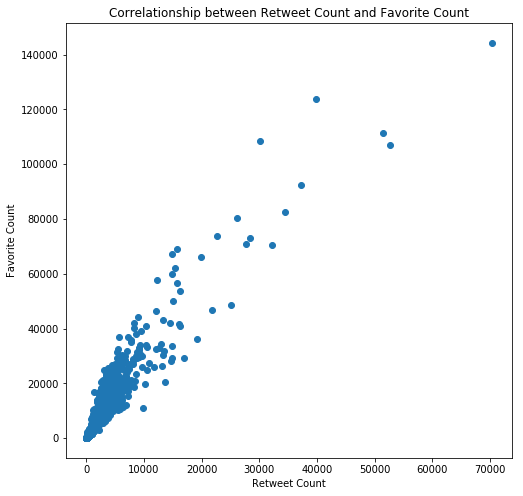

In [23]:
#plotting a scatter plot for the retweet and favorite count
plt.figure(figsize = (8,8))
plt.scatter(df['retweet_count'], df['favorite_count'])
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.title('Correlationship between Retweet Count and Favorite Count');

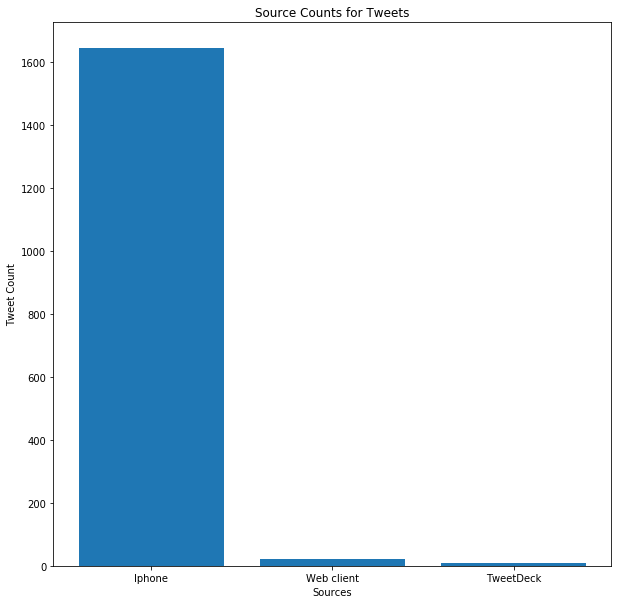

In [12]:
#plotting a bar graph for the sources
import numpy as np
ind = np.arange(len(sources))
labels = ['Iphone', 'Web client', 'TweetDeck']
plt.figure(figsize = (10,10))
plt.xticks(ind, labels)
plt.bar(ind, sources)
plt.title('Source Counts for Tweets')
plt.xlabel('Sources')
plt.ylabel('Tweet Count');